In [67]:
import os
from pathlib import Path
from pprint import pprint
from lib import utilities
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict

In [70]:
def plot_graph(recommender, results, measure):
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']#http://matplotlib.org/1.3.1/api/pyplot_api.html#matplotlib.pyplot.plot
    no_of_items_to_recommend = []
    models_dict = OrderedDict()
    for no_of_items in results:
        no_of_items_to_recommend.append(int(no_of_items))
        for model in results[no_of_items]:
            if model not in models_dict:
                models_dict[model] = []
#             for measure in results[no_of_items][model]:
#                 if measure not in models_dict[model]:
#                     models_dict[model][measure]
    #print(no_of_items_to_recommend)
    for no_of_items in no_of_items_to_recommend:
        for model in models_dict.keys():
            #print(no_of_items, model, results[str(no_of_items)][model][measure])
            val = float(results[str(no_of_items)][model][measure])
            models_dict[model].append(val)
    #pprint(models_dict)
    x_no_of_items_to_recommend = np.array(no_of_items_to_recommend)
    y_param = np.row_stack(tuple(models_dict.values()))
    #print(x_no_of_items_to_recommend)
    #print(y_param)
    #pprint(results)
    
    fig = plt.figure(figsize=(11,8))
    ax1 = fig.add_subplot(111)
    
    for model, values, col in zip(models_dict.keys(), y_param, colors):
        #print(model)
        #print(values)
        ax1.plot(x_no_of_items_to_recommend, values, label=model, color=col, marker='o')
    
    plt.xticks(x_no_of_items_to_recommend)
    plt.ylabel(measure)
    plt.xlabel('no_of_items_to_recommend')
    
    handles, labels = ax1.get_legend_handles_labels()
    lgd = ax1.legend(handles, labels, loc='upper center', bbox_to_anchor=(1.15,1))
    ax1.grid('on')
    img_name = 'results_' + measure + '.png'
    img_file = os.path.join(recommender, 'results', img_name)
    plt.savefig(img_file)
    plt.show()

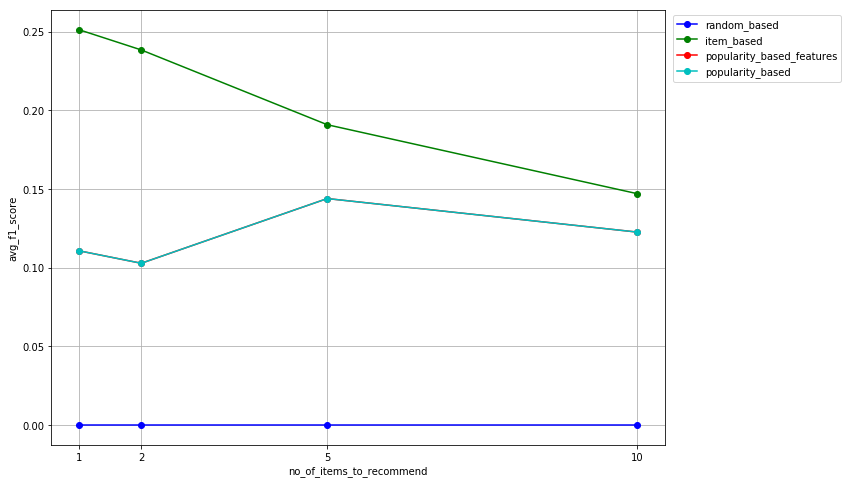

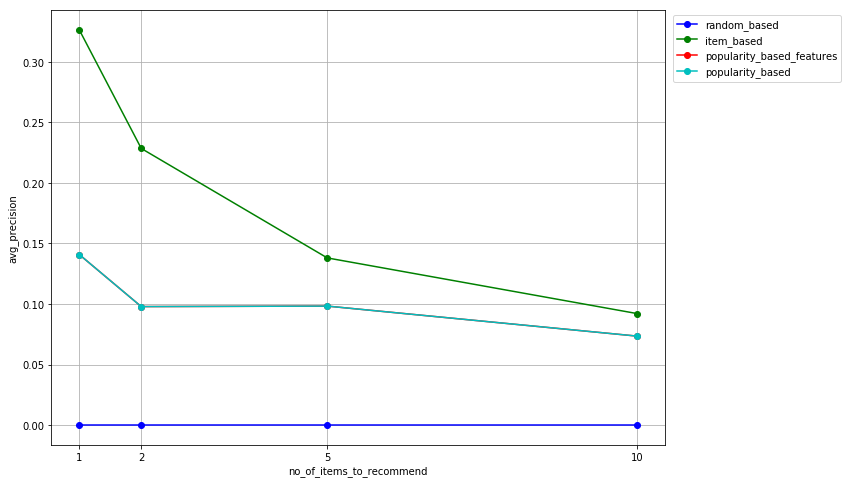

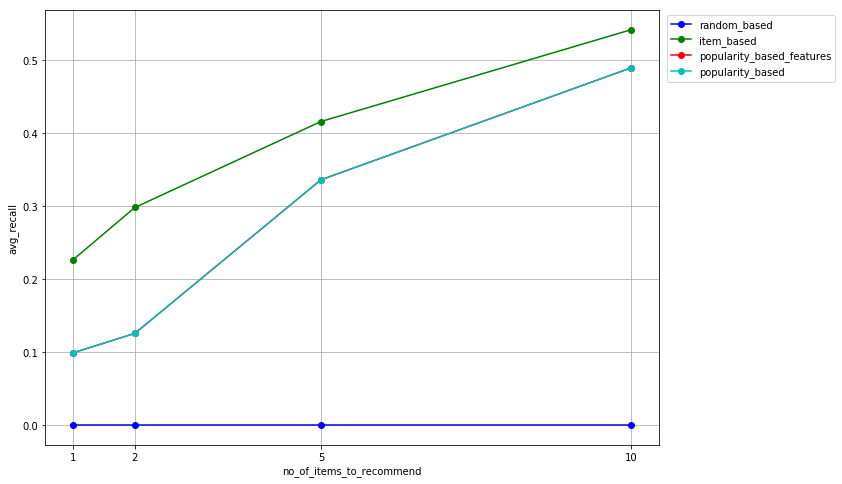

In [71]:
recommender = 'books_recommender/' 
results = dict() 

for root, dirs, files in os.walk(recommender, topdown=False): 
    for name in files: 
        if name.endswith('results.json'): 
            file_path = (os.path.join(root, name))
            #print(file_path)
            model_name = (Path(file_path).parent.name)
            result_dict = utilities.load_json_file(file_path)
            for no_of_items_to_recommend in result_dict['no_of_items_to_recommend']:
                if no_of_items_to_recommend not in results:
                    results[no_of_items_to_recommend] = dict()
                results[no_of_items_to_recommend][model_name] = result_dict['no_of_items_to_recommend'][no_of_items_to_recommend]
plot_graph(recommender, results, 'avg_f1_score')
plot_graph(recommender, results, 'avg_precision')
plot_graph(recommender, results, 'avg_recall')